In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import random

In [2]:
df = pd.read_csv('POS_CASH_balance.csv')
df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


##Column description 

1.SK_ID_PREV == ID of previous credit in Home Credit related to loan in our sample.
(One loan in our sample can have 0,1,2 or more previous loans in Home Credit)

2.SK_ID_CURR==ID of loan in our sample

3.MONTHS_BALANCE==Month of balance relative to application date
(-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )time only relative to the application

4.CNT_INSTALMENT==Term of previous credit (can change over time)

5.CNT_INSTALMENT_FUTURE==Installments left to pay on the previous credit

6.NAME_CONTRACT_STATUS==Contract status during the month

7.SK_DPD==DPD (days past due) during the month of previous credit

8.SK_DPD_DEF==DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit

In [3]:
##number of rows ==10001358 rows
##number of rows_application_train==307511
##Common column==SK_ID_CURR

In [4]:
df['SK_ID_PREV'].nunique()

936325

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [6]:
df.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [7]:
##Filling nulls in CNT_INSTALMENT,CNT_INSTALMENT_FUTURE
df = df.fillna(0)

In [8]:
df['NAME_CONTRACT_STATUS'].unique()

array(['Active', 'Completed', 'Signed', 'Approved',
       'Returned to the store', 'Demand', 'Canceled', 'XNA',
       'Amortized debt'], dtype=object)

In [9]:
##One hot encoding the categorical column 'NAME_CONTRACT_STATUS'

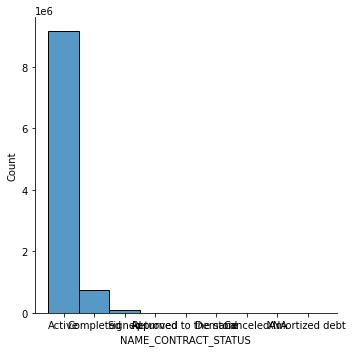

In [10]:
sns.displot(df, x="NAME_CONTRACT_STATUS", binwidth=100,discrete=True)

In [11]:
df2=pd.get_dummies(data=df, columns=['NAME_CONTRACT_STATUS'],
                     prefix=None, 
                     prefix_sep='_', 
                     dummy_na=False,drop_first=False)
df2.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,1803195,182943,-31,48.0,45.0,0,0,1,0,0,0,0,0,0,0,0
1,1715348,367990,-33,36.0,35.0,0,0,1,0,0,0,0,0,0,0,0
2,1784872,397406,-32,12.0,9.0,0,0,1,0,0,0,0,0,0,0,0
3,1903291,269225,-35,48.0,42.0,0,0,1,0,0,0,0,0,0,0,0
4,2341044,334279,-35,36.0,35.0,0,0,1,0,0,0,0,0,0,0,0


In [12]:
df2.sort_values(['SK_ID_PREV','SK_ID_CURR'], ascending=[True, True], inplace=True)
df2

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
45995,1000001,158271,-8,2.0,0.0,0,0,0,0,0,0,1,0,0,0,0
6030662,1000001,158271,-10,12.0,12.0,0,0,1,0,0,0,0,0,0,0,0
8470736,1000001,158271,-9,12.0,11.0,0,0,1,0,0,0,0,0,0,0,0
2549591,1000002,101962,-52,6.0,2.0,0,0,1,0,0,0,0,0,0,0,0
2658581,1000002,101962,-51,6.0,1.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673963,2843499,314148,-37,60.0,57.0,0,0,1,0,0,0,0,0,0,0,0
5675189,2843499,314148,-34,60.0,54.0,0,0,1,0,0,0,0,0,0,0,0
8600392,2843499,314148,-30,10.0,0.0,0,0,0,0,0,0,1,0,0,0,0
9337008,2843499,314148,-38,60.0,58.0,0,0,1,0,0,0,0,0,0,0,0


In [23]:
##Counting SD_ID_PREV for each SK_ID_CURR
prev_pos_counts = df2.groupby('SK_ID_CURR', as_index=False)['SK_ID_PREV'].count().rename(columns = {'SK_ID_PREV': 'previous_pos_counts'})
prev_pos_counts.head()

,SK_ID_CURR,previous_pos_counts
0,100001,9
1,100002,19
2,100003,28
3,100004,4
4,100005,11


In [21]:
##Checking the entry with maximum counts
print(prev_pos_counts[prev_pos_counts['previous_pos_counts']==prev_pos_counts['previous_pos_counts'].max()])

        SK_ID_CURR  previous_pos_counts
156119      265042                  295


In [22]:
#Creating the dataframe with one SK_ID_CURR
df_265042 = df2[df2['SK_ID_CURR']==265042]#, as_index=False).sum()
df_265042

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
168456,1130567,265042,-12,12.0,4.0,0,0,1,0,0,0,0,0,0,0,0
439897,1130567,265042,-15,12.0,7.0,0,0,1,0,0,0,0,0,0,0,0
1197122,1130567,265042,-14,12.0,6.0,0,0,1,0,0,0,0,0,0,0,0
1846775,1130567,265042,-9,12.0,1.0,0,0,1,0,0,0,0,0,0,0,0
2240799,1130567,265042,-17,12.0,9.0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188043,2605449,265042,-23,6.0,3.0,0,0,1,0,0,0,0,0,0,0,0
1917238,2605449,265042,-26,6.0,6.0,0,0,1,0,0,0,0,0,0,0,0
2413621,2605449,265042,-21,6.0,1.0,0,0,1,0,0,0,0,0,0,0,0
3901257,2605449,265042,-22,6.0,2.0,0,0,1,0,0,0,0,0,0,0,0


In [33]:
#Grouping the dataframe with SK_ID_PREV ,aggregating Months_Balance and scaling it 
POS_MB = df_265042.groupby('SK_ID_PREV', as_index=False)['MONTHS_BALANCE'].min()
POS_MB['MONTHS_BALANCE'] = preprocessing.scale(POS_MB['MONTHS_BALANCE'])
POS_MB.head()

,SK_ID_PREV,MONTHS_BALANCE
0,1130567,1.438735
1,1162724,-0.551217
2,1211034,0.284563
3,1295332,-1.347198
4,1295333,-0.909408
